In [132]:
pip install scikit_learn 

Note: you may need to restart the kernel to use updated packages.


In [133]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import sklearn
import pandas as pd

In [134]:
#Import Training Data\
training_data = pd.read_csv('/Users/ayodeleogundele/Desktop/data_science/ANN_pjt/data/as1-bank.csv')
print(training_data)

      age  marital  education default  balance housing loan  contact  \
0      33        1          2      no      882      no   no        1   
1      42        0          1      no     -247     yes  yes        1   
2      33        1          1      no     3444     yes   no        1   
3      36        1          2      no     2415     yes   no        1   
4      36        1          2      no        0     yes   no        1   
...   ...      ...        ...     ...      ...     ...  ...      ...   
7837   34        0          1      no     1475     yes   no        0   
7838   53        1          2      no      583      no   no        0   
7839   73        1          1      no     2850      no   no        0   
7840   72        1          1      no     5715      no   no        0   
7841   37        1          1      no     2971      no   no        0   

      duration  campaign  pdays  previous  poutcome    y  
0           39         1    151         3         0   no  
1          519   

# Data Exploration 

In [135]:
missing_values = training_data.isnull().sum()
print(missing_values)

age          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


# Data Separation: Separate target from independent variables 

In [136]:
# Target variable 
training_y = training_data.pop('y')

In [137]:
#convert targe variables to binary\
training_y.replace("yes", 1, inplace=True)
training_y.replace("no", 0, inplace=True) 

/var/folders/cm/m23x6l1d0013bw94ddpn93700000gn/T/ipykernel_1772/4101554228.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training_y.replace("no", 0, inplace=True)


In [138]:
# confirm changes 
training_y

0       0
1       1
2       1
3       0
4       1
       ..
7837    0
7838    1
7839    1
7840    1
7841    0
Name: y, Length: 7842, dtype: int64

In [139]:
# Assign dependent variables to variable 'training_x' 
training_x = training_data
print(training_x.columns) #confirm that column 'y' is not included

Index(['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')


# Data Transformation: Dependent variables   

In [140]:
# Convert columns 'default', 'housing' and 'loan' to binary
cat_columns = ['default', 'housing', 'loan']
training_x[cat_columns] = training_x[cat_columns].replace({'no':0, 'yes':1})
training_x

/var/folders/cm/m23x6l1d0013bw94ddpn93700000gn/T/ipykernel_1772/1900904614.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training_x[cat_columns] = training_x[cat_columns].replace({'no':0, 'yes':1})


,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,33,1,2,0,882,0,0,1,39,1,151,3,0
1,42,0,1,0,-247,1,1,1,519,1,166,1,2
2,33,1,1,0,3444,1,0,1,144,1,91,4,0
3,36,1,2,0,2415,1,0,1,73,1,86,4,2
4,36,1,2,0,0,1,0,1,140,1,143,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,34,0,1,0,1475,1,0,0,1166,3,530,12,2
7838,53,1,2,0,583,0,0,0,226,1,184,4,1
7839,73,1,1,0,2850,0,0,0,300,1,40,8,0
7840,72,1,1,0,5715,0,0,0,1127,5,184,3,1


# Data Split into training test datasets

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train, X_test, y_train, y_test = train_test_split(training_x, training_y, test_size=0.3, \
random_state=33, shuffle=True) 

In [143]:
print(X_train.shape)
print(X_test.shape)

(5489, 13)
(2353, 13)


# Covert Pandas to Numpy Array for ML 

In [144]:
arr_train_x = training_x.to_numpy()
arr_train_y = training_y.to_numpy()

In [145]:
print(arr_train_x)
print(arr_train_y)

[[ 33   1   2 ... 151   3   0]
 [ 42   0   1 ... 166   1   2]
 [ 33   1   1 ...  91   4   0]
 ...
 [ 73   1   1 ...  40   8   0]
 [ 72   1   1 ... 184   3   1]
 [ 37   1   1 ... 188  11   2]]
[0 1 1 ... 1 1 0]


# Define Model for training 

In [146]:
model =  keras.Sequential() 
model.add(layers.InputLayer(input_shape=(13,))) #13 columns 
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

/Users/ayodeleogundele/anaconda3/envs/data-science-env/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 481 (1.88 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

In [147]:
# Compile model
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'SGD',
    metrics = ['accuracy']
)

In [148]:
#train model
model_training_history = model.fit(
    arr_train_x,
    arr_train_y,
    epochs = 50
)

Epoch 1/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7555 - loss: 74.2050
Epoch 2/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7726 - loss: 2.2952
Epoch 3/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7742 - loss: 2.0919
Epoch 4/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7703 - loss: 0.8397
Epoch 5/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7694 - loss: 0.5554
Epoch 6/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7658 - loss: 0.5258
Epoch 7/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7642 - loss: 0.8677
Epoch 8/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7741 - loss: 0.5194
Epoch 9/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7697 - loss: 0.5202
Epoch 10/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7673 - loss: 0.5264
Epoch 11/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7757 - loss: 0.5107
Epoch 12/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [149]:
#Evaluate model 
print(model_training_history)
model_training_history
test_loss, test_acc = model.evaluate(X_test, y_test)

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7738 - loss: 0.5056


In [150]:
y_pred = model.predict(X_test)

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [151]:
# Access history object extract history attributes  
history = model_training_history.history 

# Extract accuracy and loss  
acc = history['accuracy']
loss = history['loss']

# Visualize Accuracy VS Loss

In [152]:
import matplotlib.pyplot as plt 

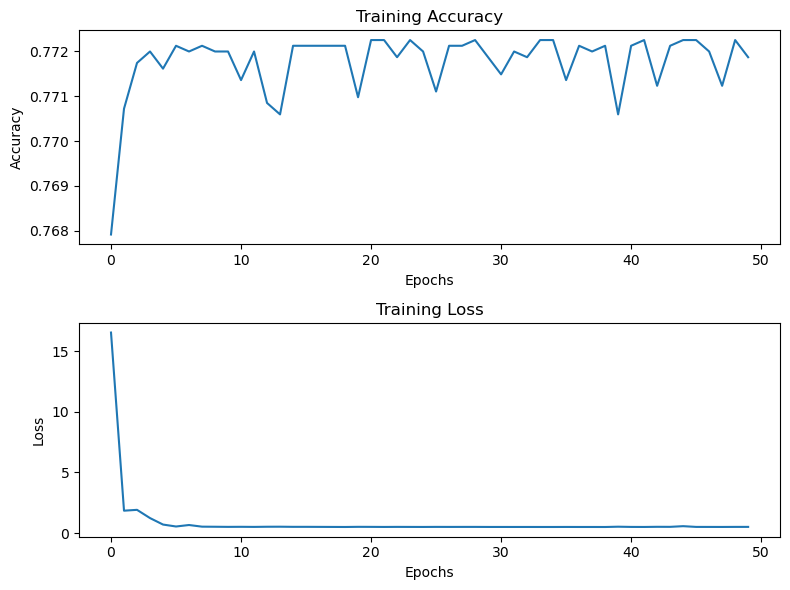

In [153]:

# Plot accuracy vs loss
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))
                               
# Plot accuracy
ax1.plot(acc, label='Training Accuracy')
ax1.set_title('Training Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')


# Plot loss
ax2.plot(loss, label='Training Loss')
ax2.set_title('Training Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')

plt.tight_layout()
plt.show()

# Confusion Metrics 

In [154]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

[[1814    0]
 [ 539    0]]


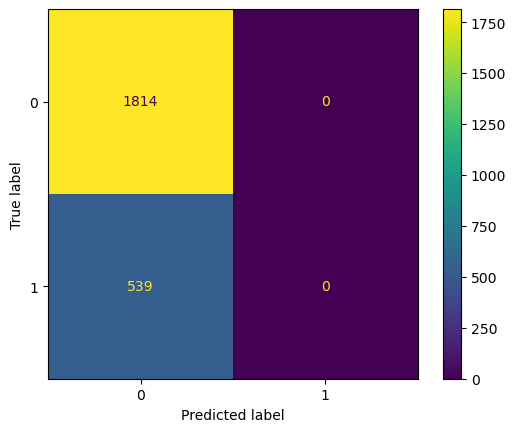

In [155]:
y_pred_rounded = np.round(y_pred)

print(confusion_matrix(y_test, y_pred_rounded))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rounded)
plt.show()

# Scale features 

In [156]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.fit_transform(X_test)

# Define Model 2 with increased Dense layers

In [157]:
model2 =keras.Sequential()
model2.add(layers.InputLayer(input_shape = (13,)))
model2.add(layers.Dense(64, activation="relu"))
model2.add(layers.Dense(32, activation="relu"))
model2.add(layers.Dense(16, activation="relu"))
model2.add(layers.Dense(8, activation="relu"))
model2.add(layers.Dense(4, activation="relu"))
model2.add(layers.Dense(1, activation="sigmoid"))

model2.summary()

/Users/ayodeleogundele/anaconda3/envs/data-science-env/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,681 (14.38 KB)

 Trainable params: 3,681 (14.38 KB)

 Non-trainable params: 0 (0.00 B)

In [158]:
# Performance tuning 
#Define optimizer 
optimizer = keras.optimizers.SGD(learning_rate=0.05)

# Compile the model2
model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [159]:
# Train the model2
model2_training_history = model2.fit(scaler_X_train, y_train, epochs=100)

Epoch 1/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7140 - loss: 0.5882
Epoch 2/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7774 - loss: 0.4334
Epoch 3/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8168 - loss: 0.3876
Epoch 4/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8183 - loss: 0.3850
Epoch 5/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8277 - loss: 0.3739
Epoch 6/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8343 - loss: 0.3593
Epoch 7/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8422 - loss: 0.3435
Epoch 8/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8498 - loss: 0.3396
Epoch 9/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8366 - loss: 0.3455
Epoch 10/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8527 - loss: 0.3295
Epoch 11/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8579 - loss: 0.3228
Epoch 12/100
172/172 ━━━━━━━━━━━━━━━━━━━━

In [160]:
# Evaluate model2 on test data
test_loss, test_acc = model2.evaluate(scaler_X_test, y_test)
print('Test Loss', test_loss)
print('Test Accuracy', test_acc)

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8104 - loss: 0.5039
Test Loss 0.4868096709251404
Test Accuracy 0.8134296536445618


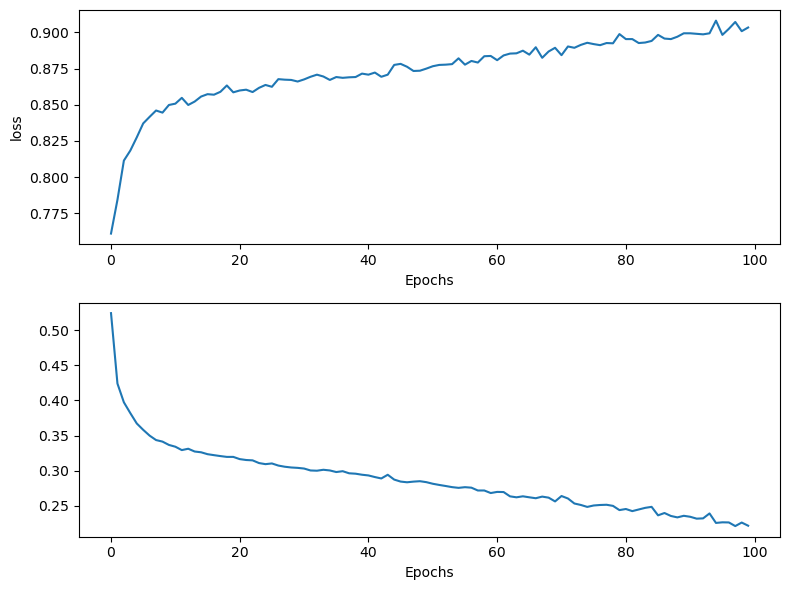

In [161]:
# Plot acc vs loss 
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,6))
acc = model2_training_history.history['accuracy']
loss = model2_training_history.history['loss']

ax1.plot(acc)
ax1.set_ylabel('Training Accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('Epochs')

ax2.plot(loss)
ax2.set_label('Training Loss')
ax1.set_ylabel('loss')
ax2.set_xlabel('Epochs')


plt.tight_layout()
plt.show()

In [162]:
# Predict on the scaled test data using model2 
y_pred = model2.predict(scaler_X_test)

# Compute confusion matrix 
cm = confusion_matrix(y_test, np.round(y_pred))
print(cm)

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
[[1581  233]
 [ 206  333]]


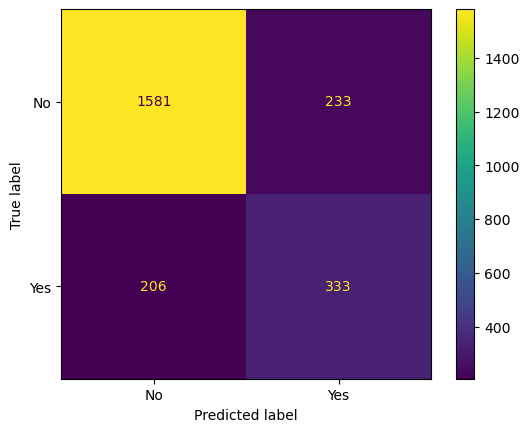

In [163]:
# Plot confusion matrix 
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
display.plot()
plt.show()

# Define model3, use copy of scaled data and drop education and balance 

## to see if these two columns have an effect on the model's performance 

In [164]:
# Create copies of the scaled datasets and delete specified columns
X_train_subset = np.delete(scaler_X_train, [2, 4], axis=1)
X_test_subset = np.delete(scaler_X_test, [2, 4], axis=1)

In [165]:
# Define Model3 
model3 = keras.Sequential()
model3.add(layers.InputLayer(input_shape=(11, )))
model3.add(layers.Dense(64, activation="relu"))
model3.add(layers.Dense(32, activation="relu"))
model3.add(layers.Dense(16, activation="relu"))
model3.add(layers.Dense(8, activation="relu"))
model3.add(layers.Dense(4, activation="relu"))
model3.add(layers.Dense(4, activation="relu"))
model3.add(layers.Dense(4, activation="relu"))
model3.add(layers.Dense(1, activation="sigmoid"))


# Two additional hidden layers included.Two columns were dropped making total columns 11.  

/Users/ayodeleogundele/anaconda3/envs/data-science-env/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [166]:
model3.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,593 (14.04 KB)

 Trainable params: 3,593 (14.04 KB)

 Non-trainable params: 0 (0.00 B)

In [167]:
#Compile model3 
model3.compile(loss='binary_crossentropy',optimizer='SGD', metrics=['accuracy'])

In [168]:
# Train model3 
model3_training_history = model3.fit(X_train_subset, y_train, epochs=120)

Epoch 1/120
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7095 - loss: 0.6666
Epoch 2/120
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7710 - loss: 0.5957
Epoch 3/120
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7692 - loss: 0.5660
Epoch 4/120
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7636 - loss: 0.5571
Epoch 5/120
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7774 - loss: 0.5381
Epoch 6/120
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7706 - loss: 0.5417
Epoch 7/120
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7734 - loss: 0.5371
Epoch 8/120
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7744 - loss: 0.5352
Epoch 9/120
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7806 - loss: 0.5275
Epoch 10/120
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7813 - loss: 0.5263
Epoch 11/120
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7698 - loss: 0.5398
Epoch 12/120
172/172 ━━━━━━━━━━━━━━━━━━━━

In [169]:
test_loss, test_acc = model3.evaluate(X_test_subset, y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8376 - loss: 0.3820
Test Loss 0.3757579028606415
Test Accuracy 0.8393540382385254


In [170]:
# Predict on test subset using model 3
y_pred = model3.predict(X_test_subset)

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


[[1676  138]
 [ 240  299]]


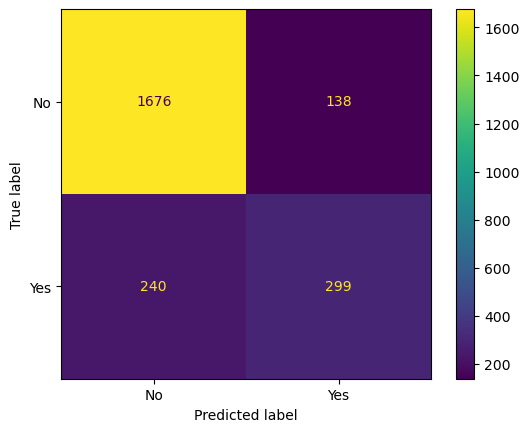

In [171]:
# Plot confusion matrix 
cm =  confusion_matrix(y_test, np.round(y_pred))
print(cm)

#Create a confusion matrix display
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
display.plot()
plt.show()

dict_keys(['accuracy', 'loss'])


Text(0.5, 0, 'Epochs')

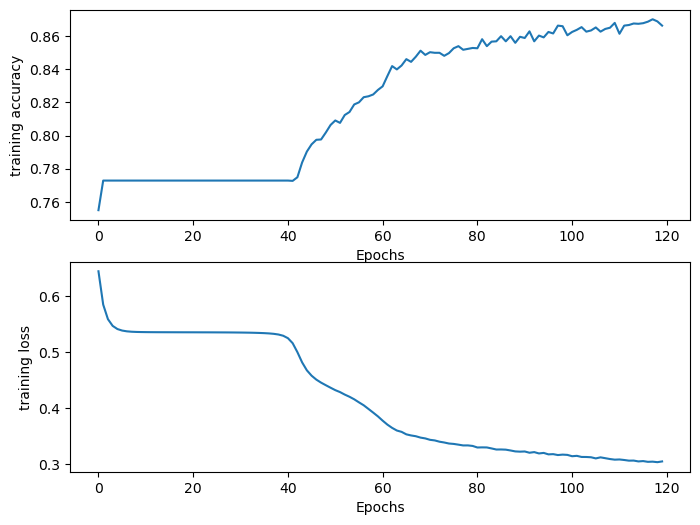

In [172]:
print(model3_training_history.history.keys())

fig, (ax1, ax2) = plt.subplots(2, figsize=(8,6))
acc = model3_training_history.history['accuracy']
loss = model3_training_history.history['loss']

ax1.plot(acc)
ax2.plot(loss)

ax1.set_ylabel('training accuracy')
ax2.set_ylabel('training loss')

ax1.set_xlabel('Epochs')
ax2.set_xlabel('Epochs')

